In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset
df=pd.read_csv(r"C:/Users/Abel/Downloads/Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


<AxesSubplot:>

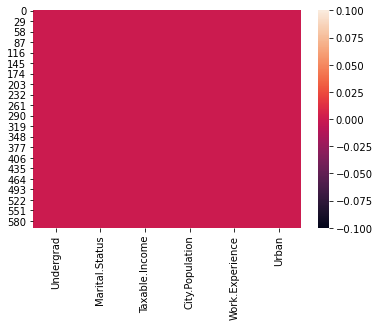

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:xlabel='Taxable.Income', ylabel='Count'>

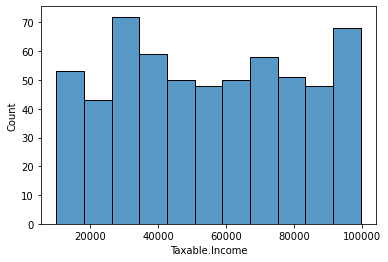

In [7]:
sns.histplot(df['Taxable.Income'])

In [8]:
#checking for the outlier using isolation forest
from sklearn.ensemble import IsolationForest
df1=pd.get_dummies(df)
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df1)
out=clf.predict(df1)
df1['anomaly']=out=clf.predict(df1)
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,anomaly
0,68833,50047,10,1,0,0,0,1,0,1,1
1,33700,134075,18,0,1,1,0,0,0,1,1
2,36925,160205,30,1,0,0,1,0,0,1,1
3,50190,193264,15,0,1,0,0,1,0,1,1
4,81002,27533,28,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,1
596,69967,55369,2,0,1,1,0,0,0,1,1
597,47334,154058,0,1,0,1,0,0,0,1,1
598,98592,180083,17,0,1,0,1,0,1,0,1


In [9]:
df1[df1['anomaly'] ==-1]

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,anomaly
29,94033,41863,30,0,1,1,0,0,0,1,-1
34,12514,183767,1,0,1,1,0,0,0,1,-1
119,97318,47202,30,1,0,1,0,0,0,1,-1
161,93659,185596,30,0,1,0,1,0,0,1,-1
280,17783,33184,1,1,0,1,0,0,1,0,-1
541,12453,191874,30,0,1,1,0,0,0,1,-1


In [10]:
#drop the row which are outlier
df2=df1.drop([29,34,119,161,280,541],axis=0).reset_index()
df2.drop(['index','anomaly'],axis=1,inplace=True)
df2

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
589,76340,39492,7,0,1,1,0,0,0,1
590,69967,55369,2,0,1,1,0,0,0,1
591,47334,154058,0,1,0,1,0,0,0,1
592,98592,180083,17,0,1,0,1,0,1,0


# Standardizing

In [11]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df_norm=std.fit_transform(df2.iloc[:,1:])
rescaled=pd.DataFrame(df_norm,columns=['City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES'])
rescaled
            

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,-1.184540,-0.629074,1.037749,-1.037749,-0.669911,-0.693756,1.318077,-1.0,1.0
1,0.512606,0.284265,-0.963624,0.963624,1.492736,-0.693756,-0.758681,-1.0,1.0
2,1.040364,1.654274,1.037749,-1.037749,-0.669911,1.441430,-0.758681,-1.0,1.0
3,1.708069,-0.058237,-0.963624,0.963624,-0.669911,-0.693756,1.318077,-1.0,1.0
4,-1.639264,1.425939,1.037749,-1.037749,-0.669911,1.441430,-0.758681,1.0,-1.0
...,...,...,...,...,...,...,...,...,...
589,-1.397723,-0.971576,-0.963624,0.963624,1.492736,-0.693756,-0.758681,-1.0,1.0
590,-1.077049,-1.542413,-0.963624,0.963624,1.492736,-0.693756,-0.758681,-1.0,1.0
591,0.916210,-1.770748,1.037749,-1.037749,1.492736,-0.693756,-0.758681,-1.0,1.0
592,1.441847,0.170098,-0.963624,0.963624,-0.669911,1.441430,-0.758681,1.0,-1.0


# Feature Selection

In [12]:
#seperating input and output
y=df2.iloc[:,0]
x=rescaled.iloc[:,:]

In [13]:
#feature selection using univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature extraction
test = SelectKBest(score_func=f_regression, k='all')
fit = test.fit(x, y)
print(fit.scores_)


[1.98650098 0.20637777 1.43943753 1.43943753 2.84691759 6.94593346
 0.87008537 2.68736125 2.68736125]


# Building Model Using top Features

In [14]:
input1=rescaled['Marital.Status_Divorced']
input2=rescaled['Marital.Status_Married']
input3=rescaled['Marital.Status_Single']
input4=rescaled['Urban_NO']
input5=rescaled['Urban_YES']
input6=rescaled['City.Population']
X=pd.concat([input1,input2,input3,input4,input5,input6],axis=1)
Y=df2.iloc[:,0]

# Building model Using cross validation

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [16]:
#splitting dataset into train test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [17]:
#building the model
rf=RandomForestRegressor()
model=rf.fit(x_train,y_train)

In [18]:
#predicting the model
y_pred=model.predict(x_test)
y_pred

array([46740.47, 70186.77, 80467.72, 32759.7 , 33085.06, 55932.71,
       49480.36, 52408.5 , 34056.9 , 45294.98, 63976.65, 30887.68,
       66784.94, 62635.56, 58377.38, 64021.25, 42514.25, 40187.09,
       59887.72, 38296.08, 76767.79, 53491.91, 39028.55, 37840.3 ,
       51865.41, 41014.28, 36906.75, 37869.31, 55853.93, 60299.5 ,
       35643.47, 53282.23, 45859.45, 64521.15, 37054.48, 45266.59,
       65717.95, 52305.65, 30539.84, 38394.58, 36273.89, 68178.93,
       81429.91, 54384.08, 37043.13, 45294.71, 57222.79, 67299.76,
       32668.26, 61212.5 , 54056.12, 53114.52, 66446.98, 32991.44,
       58043.7 , 68871.57, 41841.53, 73865.82, 49547.14, 50219.49,
       71009.54, 43007.67, 61744.07, 55999.85, 69539.95, 49316.45,
       61160.21, 75672.94, 55078.09, 33310.02, 44390.84, 76089.37,
       34095.97, 49990.8 , 51483.36, 66214.78, 51763.42, 57209.66,
       41358.03, 58002.95, 70696.21, 70497.8 , 60932.61, 26712.12,
       27787.78, 66715.27, 40303.33, 48370.46, 77334.97, 82275

In [19]:
#customised function to identify risky or good
def tax(pred):
    for i in y_pred:
        if i <= 30000:
            print('Risky')
        else:
            print('Good')
    

In [20]:
tax(y_pred)

Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Risky
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good


In [21]:
#accuracy
rmse=np.sqrt(np.mean(y_test - y_pred )**2)
rmse

942.7611173184354

[Text(0.5, 0, 'Actual')]

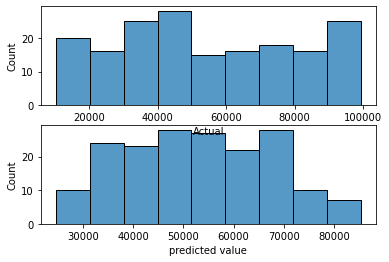

In [22]:
#visualizing actual and predicted
plt.subplot(212)
ax=sns.histplot(y_pred)
ax.set(xlabel='predicted value')

plt.subplot(211)
av=sns.histplot(y_test)
av.set(xlabel='Actual')